# Yiming Liu 

In [265]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


sys.path.append('/Users/yimingliu/Downloads/HW5-code/')
import mltools as ml # a python library used for my machine learning class
import sklearn.cross_validation

In [266]:
# Import data

data = pd.read_csv('ftp://ftp.ics.uci.edu/pub/machine-learning-databases//wine/wine.data',
                   sep=',',
                   names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                          'Total phenols',
                         'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                          'Color intensity','Hue',
                          'OD280/OD315 of diluted wines','Proline'])
data.shape

(178, 14)

In [267]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Scaling function within the mltools library 
# used to standardize the data


def rescale(X, args=None):
    """
    Shifts and scales data to be zero mean, unit variance in each dimension.
    Ex:  Xtr,args = rescale(Xtr)        # scale training data
         Xte,_    = rescale(Xte, args)  # scale test data to match training

    Parameters
    ----------
    X     : MxN numpy array containing the data matrix to be rescaled (each row one data point)
    args  : tuple (mu,scale) (optional)
        mu    : 1xN numpy array of mean values to subtract (None = estimate from data)
        scale : 1xN numpy array of inverse standard deviations to scale by (None = estimate)

    Returns
    -------
    X,args: tuple
      X are the shifted & rescaled data points
      args = (mu,scale) are the arguments to reproduce the same transform
    """
    mu,scale = args if args is not None else (None,None)
    if mu is None:
        mu = np.mean(X, axis=0)
    if scale is None:
        scale = 1.0 / np.sqrt(np.var(X, axis=0))

    X = X.copy()
    X -= mu
    X *= scale

    return X, (mu,scale)


In [268]:
Data=data.as_matrix()

# Standardize data

features,args=ml.rescale(Data[:,1:14])
label=Data[:,0]

# PCA 

In [269]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [270]:
pca = PCA(n_components=2)
X_r = pca.fit(features).transform(features)

In [271]:
# Percentage of variance explained by each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.36198848  0.1920749 ]


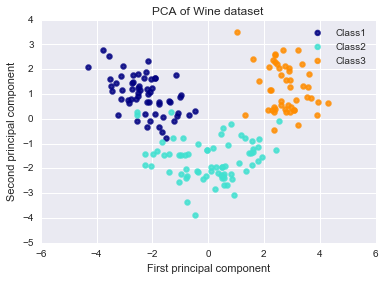

In [272]:

plt.figure()
fig2 = plt.gcf()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], ['Class1','Class2','Class3']):
    plt.scatter(X_r[label == i, 0], X_r[label== i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
fig2.savefig('Data points under two principal components.pdf')

# LDA and QDA with first two principal components

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [274]:
# Function to plot decision surface

def plot_decision_surface(clf, X_train, Y_train,label):
    plot_step=0.1
    colors=['navy', 'turquoise', 'darkorange']
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,label-1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],c=colors[0],cmap=plt.cm.Paired)
    plt.scatter(X_train[Y_train==2,0],X_train[Y_train==2,1],c=colors[1],cmap=plt.cm.Paired)
    plt.scatter(X_train[Y_train==3,0],X_train[Y_train==3,1],c=colors[2],cmap=plt.cm.Paired)
    plt.show()
    


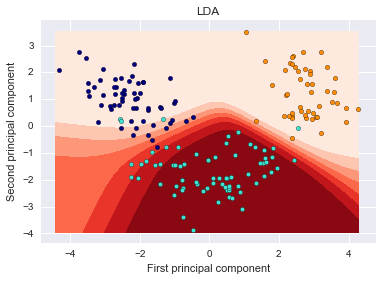

In [291]:


# Plot decision surfaces for LDA and QDA

fig3=plt.gcf()
X_imp = X_r

classifiers = [LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']

plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp, label,2)
fig3.savefig('LDA class 2.pdf')

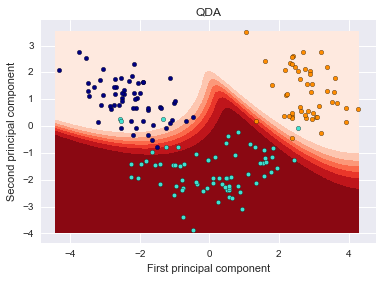

In [290]:
fig4 = plt.gcf()
X_imp = X_r
classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp, label,2)
fig4.savefig('QDA class 2.pdf')

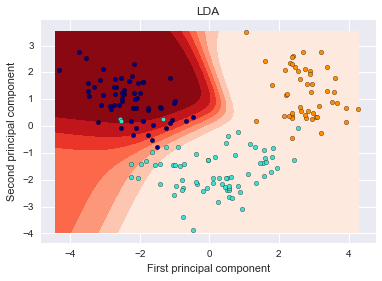

In [289]:
fig3=plt.gcf()
X_imp = X_r

classifiers = [LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']

plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp,label, 1)
fig3.savefig('LDA class 1.pdf')

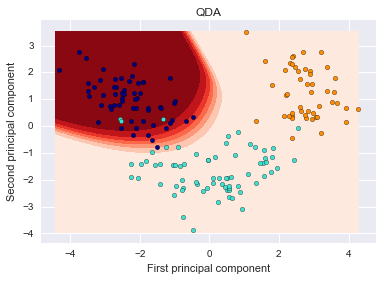

In [288]:
fig4 = plt.gcf()
X_imp = X_r
classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp, label,1)
fig4.savefig('QDA class 1.pdf')

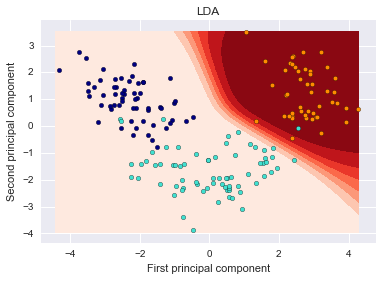

In [287]:
fig3=plt.gcf()
X_imp = X_r

classifiers = [LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']

plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp, label,3)
fig3.savefig('LDA class 3.pdf')

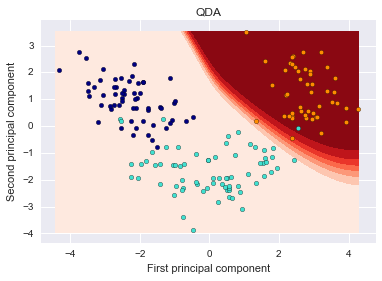

In [286]:
fig4 = plt.gcf()
X_imp = X_r
classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plot_decision_surface(classifiers[0], X_imp, label,3)
fig4.savefig('QDA class 3.pdf')

# LDA and QDA with two most important features

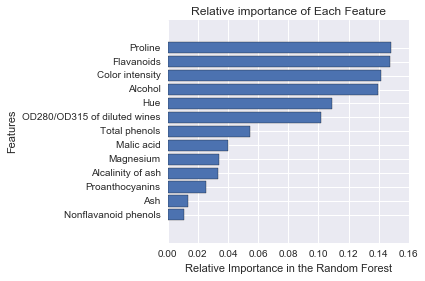

In [238]:
# Determine features relative importance through Random forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
clf = RandomForestClassifier(n_estimators=100)

clf.fit(features,label)
importance_list = clf.feature_importances_
name_list = data.columns[1:14]
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
fig1 = plt.gcf()
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.tight_layout()
fig1.savefig('Relative importance.pdf',dpi=400)
plt.show()

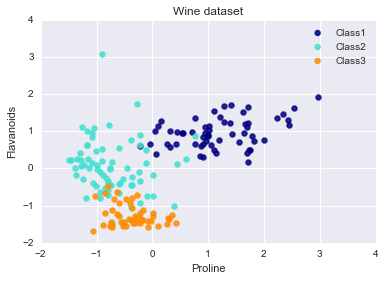

In [193]:
plt.figure()
fig2 = plt.gcf()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], ['Class1','Class2','Class3']):
    plt.scatter(features[:,12][label == i], features[:,6][label== i], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Wine dataset')
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
fig2.savefig('Datarandom1 .pdf')

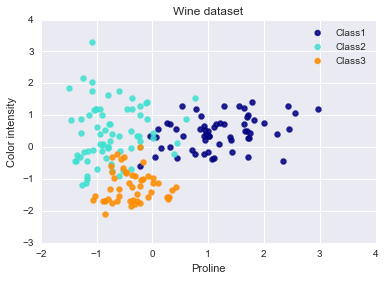

In [194]:
plt.figure()
fig2 = plt.gcf()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], ['Class1','Class2','Class3']):
    plt.scatter(features[:,12][label == i], features[:,10][label== i], color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Wine dataset')
plt.xlabel('Proline')
plt.ylabel('Color intensity')
fig2.savefig('Datarandom2.pdf')

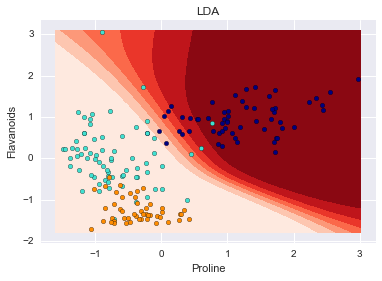

In [285]:

# Perform LDA and QDA with Flavanoids and Proline,
# and plot corresponding decsion surface




fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,1)
fig1.savefig('LDA class1-1.pdf')

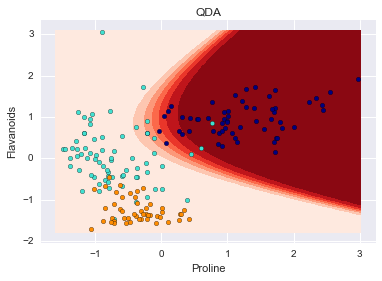

In [284]:
fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,1)
fig1.savefig('QDA class1-1.pdf')

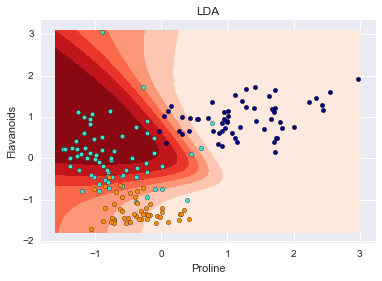

In [283]:
fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,2)
fig1.savefig('LDA class2-1.pdf')

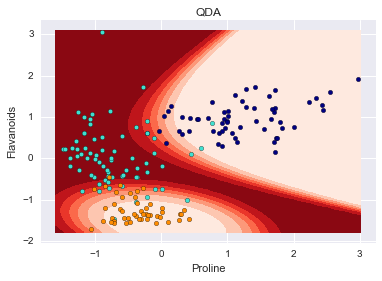

In [282]:
fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,2)
fig1.savefig('QDA class2-1.pdf')

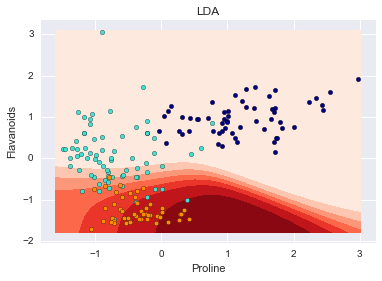

In [281]:
fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[LinearDiscriminantAnalysis()]

titleClassifer = ['LDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,3)
fig1.savefig('LDA class3-1.pdf')

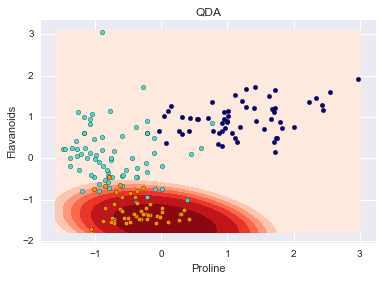

In [280]:
fig1 = plt.gcf()
X_imp = features[:,[12,6]]

classifiers =[QuadraticDiscriminantAnalysis()]

titleClassifer = ['QDA']
plt.title(titleClassifer[0])
plt.xlabel('Proline')
plt.ylabel('Flavanoids')
plot_decision_surface(classifiers[0], X_imp, label,3)
fig1.savefig('QDA class3-1.pdf')

# Leave-one-out classfication correction rate
# (Using only feature Proline and feature Flavanoids)

In [233]:
# Correction rate for LDA

X_imp=features[:,[12,6]]
clf=LinearDiscriminantAnalysis()
prediction=[]
for i in range(178):
    clf.fit(np.delete(X_imp,i,axis=0),np.delete(label,i,axis=0))
    Z = clf.predict(X_imp[i,:].reshape(1,-1))
    if Z==label[i]:
        prediction.append(1)
    else:
        prediction.append(0)
np.mean(prediction)
    

    

0.8932584269662921

In [235]:
# Correction rate for QDA

X_imp=features[:,[12,6]]
clf=QuadraticDiscriminantAnalysis()
prediction=[]
for i in range(178):
    clf.fit(np.delete(X_imp,i,axis=0),np.delete(label,i,axis=0))
    Z = clf.predict(X_imp[i,:].reshape(1,-1))
    if Z==label[i]:
        prediction.append(1)
    else:
        prediction.append(0)
np.mean(prediction)

0.9101123595505618

# Leave-one-out classfication correction rate
# (Using first two principal components)

In [257]:
# Correction rate for LDA

X_imp=X_r
clf=LinearDiscriminantAnalysis()
prediction=[]
for i in range(178):
    clf.fit(np.delete(X_r,i,axis=0),np.delete(label,i,axis=0))
    Z = clf.predict(X_r[i,:].reshape(1,-1))
    if Z==label[i]:
        prediction.append(1)
    else:
        prediction.append(0)
np.mean(prediction)
    

0.9719101123595506

In [256]:
# Correction rate for QDA

X_imp=X_r
clf=QuadraticDiscriminantAnalysis()
prediction=[]
for i in range(178):
    clf.fit(np.delete(X_r,i,axis=0),np.delete(label,i,axis=0))
    Z = clf.predict(X_r[i,:].reshape(1,-1))
    if Z==label[i]:
        prediction.append(1)
    else:
        prediction.append(0)
np.mean(prediction)
    

0.9662921348314607